# KNN (K_Nearest Neighbor,KNN)

**KNN은 새로운 데이터가 주어졌을 때 기존 데이터 가운데 가장 가까운 k개 이웃의 정보로 새로운 데이터를 예측하는 방법론**

In [1]:
import pandas as pd #파일 불러오고 처리
import numpy as np #연산
import seaborn as sns #시각화 라이브러리
import matplotlib.pyplot as plt #시각화 라이브러리

In [5]:
#데이터 로드하기(pandas 이용)
data = pd.read_csv("./input/2019.csv")

In [6]:
#데이터 null값 확인(비어있는 값)
print(data.isnull().sum())
data.describe()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


- 결측치는 관측되지 않았다. 
- 모든 열이 동일하게 156개의 관측치(나라)로 이루어져 있음을 알 수 있다.

In [7]:
#예측하는데 필요하는 feature제거 
rank = data['Overall rank']
country = data['Country or region']
data.drop(['Overall rank', 'Country or region'], axis=1, inplace=True)
data

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...
151,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
#정규화 수행 (X에만 수행)
standard_scaler = StandardScaler()
X = data.iloc[:,1:] # Score을 제외
X = standard_scaler.fit_transform(X) # X에 대한 정규화 
y = data['Score'] # Score 따로 저장

In [14]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=2021, test_size=0.2) #test_size=0.2로 하기

In [15]:
print(len(train_X), len(train_y), len(test_X), len(test_y))

124 124 32 32


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [31]:
knn = KNeighborsRegressor()
params = {'n_neighbors': [3,5,7,11,13],
          'weights': ['uniform', 'distance'],
          'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(knn,
                           params,
                           'neg_mean_squared_error',
                           cv=5) #폴드는 5개로

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass scoring=neg_mean_squared_error as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [33]:
grid_search.fit(train_X, train_y) #데이터 학습시키기

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [34]:
# grid search cv 결과 시각화
# n_neighbors가 얼마일 때 test_score가 적은 지/큰 지 확인해보고 적절한 값을 선택하시면 됩니다.
pd.DataFrame(grid_search.cv_results_)[['param_n_neighbors', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,param_n_neighbors,mean_test_score,std_test_score,rank_test_score
17,11,-0.269521,0.095393,1
19,13,-0.272949,0.093956,2
15,7,-0.275347,0.090240,3
16,11,-0.277105,0.102421,4
14,7,-0.278227,0.097133,5
18,13,-0.282954,0.099158,6
7,11,-0.283117,0.094114,7
5,7,-0.287567,0.079133,8
12,5,-0.287581,0.080298,9
13,5,-0.288149,0.075882,10


<AxesSubplot:>

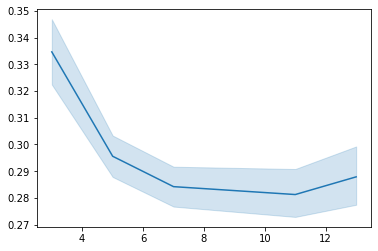

In [35]:
# n_neighbors에 따라 score가 어떻게 변하는 지 시각화
sns.lineplot(x=grid_search.cv_results_['param_n_neighbors'], y=-grid_search.cv_results_['mean_test_score'])

In [39]:
from sklearn import metrics
# grid search 통해 구한 최적의 hyperparameter로 다시 학습/예측/평가
knn_reg = KNeighborsRegressor(n_neighbors=grid_search.best_params_['n_neighbors'])
knn_reg.fit(train_X, train_y) #최적의 K로 학습
pred_y = knn_reg.predict(test_X) #예측
metrics.mean_squared_error(pred_y, test_y) #점수 도출

0.2736326237086776